<a href="https://colab.research.google.com/github/saranyak2/HeartStrokeDetection-using-ML/blob/main/19BCN7187_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING MINI PROJECT**

### **Comparative analysis of healthcare dataset using svm,knn,logistic regression,decision tree and random forest algorithms**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(dataset.head())

      id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...  27.0     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1

[5 rows x 12 columns]


In [ ]:
dataset.drop('id',axis=1,inplace=True)
print(dataset)

     gender   age  hypertension  ...   bmi   smoking_status stroke
0      Male  67.0             0  ...  36.6  formerly smoked      1
1    Female  61.0             0  ...  27.0     never smoked      1
2      Male  80.0             0  ...  32.5     never smoked      1
3    Female  49.0             0  ...  34.4           smokes      1
4    Female  79.0             1  ...  24.0     never smoked      1
..      ...   ...           ...  ...   ...              ...    ...
794  Female  42.0             0  ...  24.0           smokes      0
795  Female  31.0             0  ...  20.5  formerly smoked      0
796  Female  29.0             0  ...  20.4     never smoked      0
797  Female  23.0             0  ...  27.6     never smoked      0
798  Female  25.0             0  ...  27.0           smokes      0

[799 rows x 11 columns]


In [ ]:
print(dataset.smoking_status.unique())
print(dataset.gender.unique())
print(dataset.hypertension.unique())
print(dataset.heart_disease.unique())
print(dataset.ever_married.unique())
print(dataset.Residence_type.unique())
print(dataset.work_type.unique())

['formerly smoked' 'never smoked' 'smokes']
['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Urban' 'Rural']
['Private' 'Self-employed' 'Govt_job' 'Never_worked']


In [ ]:
smoking_status_to_num = {'never smoked': 0,'smokes': 1,'formerly smoked': 2}
temp = dataset['smoking_status'].map(smoking_status_to_num)
print(temp)
dataset['smoking_status']=temp

0      2
1      0
2      0
3      1
4      0
      ..
794    1
795    2
796    0
797    0
798    1
Name: smoking_status, Length: 799, dtype: int64


In [ ]:
Residence_type_to_num={'Urban':0,'Rural':1}
temp1=dataset['Residence_type'].map(Residence_type_to_num)
print(temp1)
dataset['Residence_type']=temp1

0      0
1      1
2      1
3      0
4      1
      ..
794    1
795    1
796    0
797    0
798    0
Name: Residence_type, Length: 799, dtype: int64


In [ ]:
work_type_to_num={'Private':0,'Self-employed':1,'Govt_job':2,'Never_worked':3}
temp2=dataset['work_type'].map(work_type_to_num)
print(temp2)
dataset['work_type']=temp2

0      0
1      1
2      0
3      0
4      1
      ..
794    0
795    2
796    0
797    0
798    0
Name: work_type, Length: 799, dtype: int64


In [ ]:
gender_to_num={'Male':0,'Female':1}
temp3=dataset['gender'].map(gender_to_num)
print(temp3)
dataset['gender']=temp3

0      0
1      1
2      0
3      1
4      1
      ..
794    1
795    1
796    1
797    1
798    1
Name: gender, Length: 799, dtype: int64


In [ ]:
ever_married_to_num={'Yes':0,'No':1}
temp4=dataset['ever_married'].map(ever_married_to_num)
print(temp4)
dataset['ever_married']=temp4

0      0
1      0
2      0
3      0
4      0
      ..
794    0
795    0
796    1
797    1
798    1
Name: ever_married, Length: 799, dtype: int64


In [ ]:
print(dataset)

     gender   age  hypertension  ...   bmi  smoking_status  stroke
0         0  67.0             0  ...  36.6               2       1
1         1  61.0             0  ...  27.0               0       1
2         0  80.0             0  ...  32.5               0       1
3         1  49.0             0  ...  34.4               1       1
4         1  79.0             1  ...  24.0               0       1
..      ...   ...           ...  ...   ...             ...     ...
794       1  42.0             0  ...  24.0               1       0
795       1  31.0             0  ...  20.5               2       0
796       1  29.0             0  ...  20.4               0       0
797       1  23.0             0  ...  27.6               0       0
798       1  25.0             0  ...  27.0               1       0

[799 rows x 11 columns]


In [ ]:
X=dataset.drop('stroke',axis=1)
print(X)

Y=dataset['stroke']
print(Y)


     gender   age  hypertension  ...  avg_glucose_level   bmi  smoking_status
0         0  67.0             0  ...             228.69  36.6               2
1         1  61.0             0  ...             202.21  27.0               0
2         0  80.0             0  ...             105.92  32.5               0
3         1  49.0             0  ...             171.23  34.4               1
4         1  79.0             1  ...             174.12  24.0               0
..      ...   ...           ...  ...                ...   ...             ...
794       1  42.0             0  ...              88.31  24.0               1
795       1  31.0             0  ...             103.55  20.5               2
796       1  29.0             0  ...              60.26  20.4               0
797       1  23.0             0  ...              79.39  27.6               0
798       1  25.0             0  ...             122.01  27.0               1

[799 rows x 10 columns]
0      1
1      1
2      1
3      1
4  

In [ ]:
X1=dataset.loc[:,['age','bmi']]
X1=X1.to_numpy()
Y1=Y.to_numpy()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

### **SVM LINEAR KERNAL**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


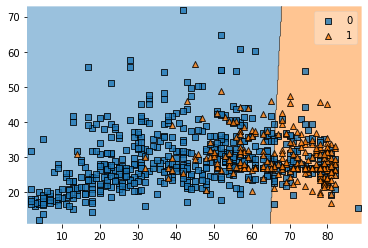

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X1,Y1)
plot_decision_regions(X=X1,y=Y1,clf=svm)

In [ ]:
svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)
predict=svm.predict(X_test)
SVM_f1=f1_score(Y_test,predict)
SVM_f1

0.62

### **KNN**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


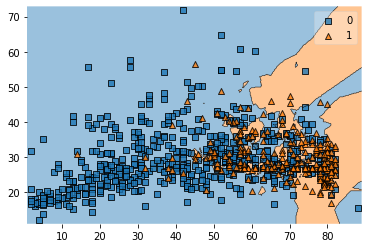

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X1,Y1)
plot_decision_regions(X=X1,y=Y1,clf=knn)

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
predict=knn.predict(X_test)
knn_f1=f1_score(Y_test,predict)
knn_f1

0.5599999999999999

# **logistic regression**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


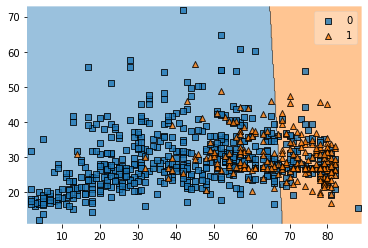

In [ ]:
lo=LogisticRegression()
lo.fit(X1,Y1)
plot_decision_regions(X=X1,y=Y1,clf=lo)

In [ ]:
lo=LogisticRegression()
lo.fit(X_train,Y_train)
predict=lo.predict(X_test)
lo_f1=f1_score(Y_test,predict)
lo_f1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6000000000000001

## **Decision tree**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


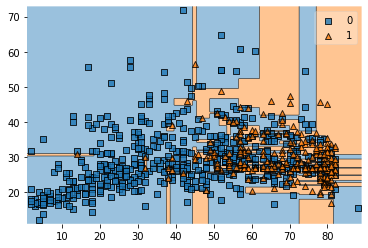

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X1,Y1)
plot_decision_regions(X=X1,y=Y1,clf=dt)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
predict=dt.predict(X_test)
dt_f1=f1_score(Y_test,predict)
dt_f1

0.553191489361702

# **Random Forest**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


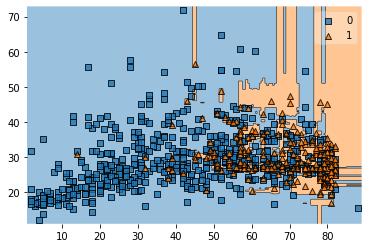

In [ ]:
rf=RandomForestClassifier()
rf.fit(X1,Y1)
plot_decision_regions(X=X1,y=Y1,clf=rf)

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predict=rf.predict(X_test)
rf_f1=f1_score(Y_test,predict)
rf_f1

0.5494505494505494

# **Graph between algoritms and accuracies**

In [ ]:
SVM_f1*=100
SVM_f1

62.0

In [ ]:
knn_f1*=100
knn_f1

55.99999999999999

In [ ]:
dt_f1*=100
dt_f1

55.3191489361702

In [ ]:
lo_f1*=100
lo_f1

60.00000000000001

In [ ]:
rf_f1*=100
rf_f1

54.94505494505494

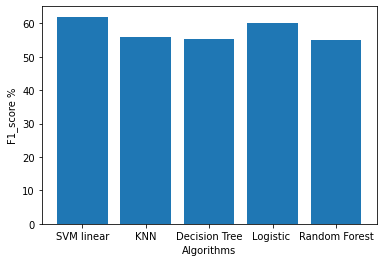

In [ ]:
plt.bar(['SVM linear','KNN','Decision Tree','Logistic ','Random Forest'],[SVM_f1,knn_f1,dt_f1,lo_f1,rf_f1])
plt.xlabel("Algorithms")
plt.ylabel("F1_score %")
plt.show()